In [132]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# **Distance between PDFs:**

 In this question you will explore the other “distances” between PDFs discussed in class. To verify the implementation of these distances, use the normalized histogram of the stereo image pair (left.png, right.png) used in the previous assignment.

## 1a) ***Cross Entropy (CE):***

The cross entropy between two PDFs (PMFs) p and q is given by: H(p, q) = H(p) + D(p||q) where H(p) is the entropy of p and D(p||q) is the KL divergence between p and q. Write a function that accepts two PDFs (PMFs) p, q and outputs the CE between them.

In [133]:
def ComputeEntropy(pmf):
  entropy=0
  for i in range(len(pmf)):
    if pmf[i]!=0:
      entropy+=-(pmf[i]*np.log2(pmf[i]))
  return entropy    


In [134]:
def CreateBernoullipmf(p):
  return [p,1-p]

In [135]:
def CalculateKLDivergence(prob_dist1,prob_dist2):
  d_KL=0
  for i in range(len(prob_dist1)):
    if prob_dist1[i]!=0 and prob_dist2[i]!=0:
      d_KL+=prob_dist1[i]*np.log2(prob_dist1[i]/prob_dist2[i])
  return d_KL    

In [136]:
def InitializeDictForGrayScale():
  histogram_dict={}
  pixel_values=np.linspace(0,255,256)
  pixel_values=[int(x) for x in pixel_values]
  histogram_dict = {pixel_value: 0 for pixel_value in pixel_values}
  return histogram_dict

In [137]:
def NormalizeHistogram(hist,n_pixels):
     if n_pixels==0:
       return hist
     for i in hist:
       hist[i]=hist[i]/n_pixels
     return hist  

In [138]:
def GetHistogram(image_data,h,w):
  hist_dic={}
  hist_dic=InitializeDictForGrayScale()
  for i in range(w):
    for j in range(h):
      pixel_value=image_data[i][j]
      hist_dic[pixel_value]=hist_dic[pixel_value]+1
  return hist_dic 

In [139]:
def GetNormalizedHistogram(image_data,h,w):
    hist=GetHistogram(image_data,h,w)
    norm_hist=NormalizeHistogram(hist,h*w)
    return norm_hist

In [140]:
def ReadImage(imagename):
 image = Image.open(imagename)
 image_data=np.array(image)
 return image,image_data

### i) Verify your function using the stereo image normalized histogram pair.

In [141]:
def CrossEntropy(p,q):
  h_p=ComputeEntropy(p)
  kl= CalculateKLDivergence(p,q)
  cross_entropy= h_p + kl
  return cross_entropy

In [142]:
rightimage,rightImgData=ReadImage('right.png')
h,w=rightimage.size
leftimage,leftImgData=ReadImage('left.png')

p_norm_hist=GetNormalizedHistogram(leftImgData,h,w)
q_norm_hist=GetNormalizedHistogram(rightImgData,h,w)

In [143]:
Cross_Entropy=CrossEntropy(p_norm_hist,q_norm_hist)
print("Cross_Entropy:"+str(Cross_Entropy))

Cross_Entropy:7.273398119987328


### ii) As with the KL divergence problem, choose a fixed PMF p ∼ Bern(r). Choose another PMF q ∼ Bern(s) where s can be varied. Plot H(p, q) as a function of s. From the plot, does minimizing H(p, q) give us matched PMFs?

In [144]:
def PlotHvsS(r):
  p_pmf=CreateBernoullipmf(r)
  s_values=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8]
  d1=list()
  for i in s_values:
   q_pmf=CreateBernoullipmf(i)
   d1.append(CrossEntropy(p_pmf,q_pmf))
  print(d1)
  plt.plot(s_values,d1,color='r',label='H(p,q)')  
  plt.title("H(p,q) vs s_values")
  plt.xlabel("s_values")
  plt.ylabel("Cross Entropy")
  plt.legend(loc='best')
  plt.show()

[0.944484343805628, 0.8219280948873623, 0.8112781244591328, 0.8201712781638701, 0.8832062193464951, 1.0, 1.1756874697070732, 1.4313674888320942, 1.8219280948873626]


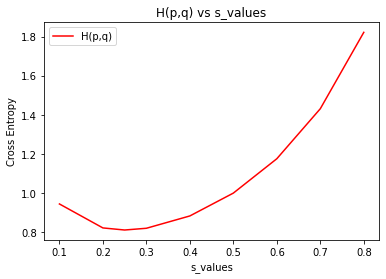

In [145]:
PlotHvsS(0.25)

[1.1029805938777435, 0.9219280948873623, 0.8905262494951907, 0.8812908992306927, 0.9124543443825531, 1.0, 1.1464393446710155, 1.3702478677652716, 1.7219280948873623]


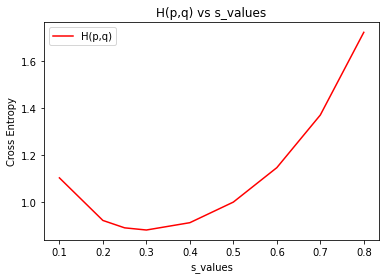

In [146]:
PlotHvsS(0.3)

Above two plot shows that cross entropy attains minimum when r=s

## 1b) ***Jensen Shannon (JS) Divergence:***

The definition of JS divergence between two PDFs p and q is
given by: J(p, q) = D(p||m) + D(q||m) where m =
p+q
2

and D(p||q) is the KL divergence be-
tween p and q. Write a function that accepts two PDFs (PMFs) p, q and outputs the JS divergence

between them. Verify that the JS(p, q) is symmetric indeed while D(p||q) is not. Again, use the
normalized histograms of the stereo image pair.

In [147]:
def GetAveragepmf(p,q):
  m=InitializeDictForGrayScale()
  for i in p.keys():
    m[i]=(p[i]+q[i])/2
  return m 

In [148]:
def JSDivergence(p,q):
  m=GetAveragepmf(p,q)
  jsdivergence=CalculateKLDivergence(p,m)+CalculateKLDivergence(q,m)
  return jsdivergence

In [149]:
jsdivergence=JSDivergence(p_norm_hist,q_norm_hist)
print("Jensen Shannon(JS) Divergence: "+ str(jsdivergence))

Jensen Shannon(JS) Divergence: 0.00734607953862965


In [150]:
jsdivergence=JSDivergence(q_norm_hist,p_norm_hist)
print("Jensen Shannon(JS) Divergence: "+ str(jsdivergence))

Jensen Shannon(JS) Divergence: 0.00734607953862965


As we can see the distance is symmetric

## 1c) ***Wasserstein Distance:***

The Wasserstein-1 distance between two PDFs r and s is given by: W1(r,s) =
inf
π∈Π(r,s)
E(x,y)∼π|x − y|. The set Π(r,s) is composed of all bivariate joint PDFs whose marginals
equal r and s. Given a tuple (p(X,Y),rX,sY) of a joint histogram p(X,Y), and marginals rX,sY, write a function that accepts this tuple and checks if pX,Y ∈ Π(r,s). Verify your function with a
positive example and a negative example.

In [151]:
def CheckIfJoinDistributionBelongstoSet(joint_dist,rX,sY):
  belongingness=False  
  marginal_x= np.sum(joint_dist,axis=0)
  marginal_y= np.sum(joint_dist,axis=1)
  if (marginal_x == rX).all() and (marginal_y == sY).all():
     belongingness=True
  if belongingness:
    print("The joint distribution belongs to the set Π(r,s) since the marginals are equal")
  else :  
    print("The joint distribution does not belong to the set Π(r,s) since the marginals are not equal")   

The positive example is taken from [Joint Distribution positive example](https://https://en.wikipedia.org/wiki/Marginal_distribution#:~:text=Given%20a%20known%20joint%20distribution,are%20not%20taken%20into%20consideration.)
and the negative example is obtained by swapping two columns.

In [152]:
positve_j=[[1/8,1/16,1/32,1/32],[3/32,6/32,3/32,3/32],[9/32,0,0,0]]
negative_j=[[1/8,1/32,1/16,1/32],[3/32,3/32,6/32,3/32],[9/32,0,0,0]]
rX=[1/2,1/4,1/8,1/8]
sY=[1/4,15/32,9/32]


In [153]:
CheckIfJoinDistributionBelongstoSet(positve_j,rX,sY)


The joint distribution belongs to the set Π(r,s) since the marginals are equal


In [154]:
CheckIfJoinDistributionBelongstoSet(negative_j,rX,sY)

The joint distribution does not belong to the set Π(r,s) since the marginals are not equal


# **Visualizing Data Using t-SNE:**

##2(a) Read the t-SNE paper and answer the following questions. Do not reproduce text from the paper verbatim in your answers.

### ***Crowding problem***

What is the crowding problem?

Crowding problem happens when a high dimensional data is converted to lower (2 or 3) dimension.

The problem is that suppose there are data points closer in high dimensional space and some point moderately far away to one of the data points .Now, we need to represent the same in lower dimesion. ***If we try to represent closer data points in smaller dimension clearly or distinctly then the the data point moderately far will go relatively much farther*** and if we keep the moderately farther distance intact than closer points will crowd at a singular point. This problem of representing such data points in lower dimensions is called as crowding problem.

### ***Student t-distribution***

How does the choice of the Student t-distribution in the low dimensional embedding space
help address the crowding problem?

The Student t-distribution in lower dimesnional helps because of the nature of the formula

\(1 + ||$y_i$ -$y_j$||$^{2}$)$^{-1}$

For larger distances the inverse makes the value smaller hence making it more robust to variatians in changes and provide a better map for joint probabilities.

Also it is made up of mixture of infinte guassians where calculate density is easier and since the formula doesnot involve exponentials it makes it simpler to compute.



### ***t-SNE relative to SNE***

What other important changes have been made in t-SNE relative to SNE?

t-SNE focuses on representing disimilar points with larger distances and closer points with smaller distances. The farther distance never approaches infinity.

*   t-SNE introduces long range force this aids in pulling back two clusters together that might have gotten separated early dur to optimization whereas in SNE if the cluster gets separated they will remain separated

* Optimization of cost function of t-SNE is easier than SNE 

*   t-SNE is less computational intensive and calculation of density of the point becomes easier

* t-SNE is symetric and it also better in yhandling crowding problem.   



## 2(b) In this problem, implement Algorithm 1 from the paper, albeit in a simplified setting as described in the following.

Generate two clusters of points from a ten-dimensional multivariate Gaussian (MVG) distribution N (μ, 0.01 · I) where I is the ten-dimensional identity matrix.


• Use μ1 = 1 for 
one cluster and μ2 = 10 · 1 for the other (where 1 is the ten-dimensional
vector of ones).

• Generate 10 points from each cluster for a total of 20 points to form the set X .

• Choose the dimension of the embedding to be two.

• Choose T = 50.

• Experiment with different choices for η and α(t). For simplicity, let α(t) not change with
iterations.

• Use your knowledge of how X was generated for choices of σi (as opposed to finding them using the user-defined Perplexity).

• Plot the points in Y at the beginning and at the end of 50 iterations. Print your observations
from the plots.

• Find and print D(P||Q) at the beginning and at the end of 50 iterations. Print your observa-
tions from these values.

• The YouTube video by the first author Laurens van der Maaten can be found here.




### Utils

In [353]:
def KLD(d1,d2):
  distance=0
  for i in range(len(d1)):
         distance+=CalculateKLDivergence(d1[i],d2[i])
  print("Distance between distributions is:"+ str(distance)) 

In [236]:
def norm(vecs):
  norm=np.sum(np.abs(vecs))
  return norm

In [361]:
def GenerateClusterPoints():
   mean1=[1,1,1,1,1,1,1,1,1,1]
   mean2=[10,10,10,10,10,10,10,10,10,10]
   cov1=[[0.01,0,0,0,0,0,0,0,0,0],[0,0.01,0,0,0,0,0,0,0,0],[0,0,0.01,0,0,0,0,0,0,0],[0,0,0,0.01,0,0,0,0,0,0],[0,0,0,0,0.01,0,0,0,0,0],
         [0,0,0,0,0,0.01,0,0,0,0],[0,0,0,0,0,0,0.01,0,0,0],[0,0,0,0,0,0,0,0.01,0,0],[0,0,0,0,0,0,0,0,0.01,0],[0,0,0,0,0,0,0,0,0,0.01]]
   c1= np.random.multivariate_normal(mean1, cov1, 10) 
   c2= np.random.multivariate_normal(mean2, cov1, 10) 
   Y=np.random.multivariate_normal([0,0], [[0.01,0],[0,0.01]], 20) 
   return c1, c2, Y

In [238]:
def NormSquare(x1,x2):
   diff= norm(x1-x2)**2
   return diff

In [314]:
def Gausianfn(x1,x2,var=0.01):
    diff=NormSquare(x1,x2)
    return np.exp(-diff/(2*var))

In [240]:
def InverseSquarefn(x1,x2):
   diff=NormSquare(x1,x2)
   return ((1 + diff)**(-1))    

In [241]:
def Costfn(i,pij,qij,Y):
  dC=0
  for j in range(len(pij)):
    dC+=(pij[i][j]-qij[i][j])*(Y[i]-Y[j])*((1+norm((Y[i]-Y[j])**2))**(-1))
  dC=4*dC
  return dC    

In [242]:
def GetConditionalProb(sim_mat,i,j,perplexity):
  val=sim_mat[i][j]
  xi=sim_mat[i]
  sorted(xi)
  xi=xi[:perplexity]
  sum=np.sum(xi,axis=0)
  if sum!=0:
    return val/sum
  else :
    return 0  

In [243]:
def CalSimilarityVal(X,fn='guassian'):
   sim_mat=list()
   for i in range(len(X)):
       sum=0
       pij_l=list()
       for j in range(len(X)):
          if i==j :
           pij_l.append(0)
          else :
           if fn =='guassian':  
             pij= Gausianfn(X[i],X[j]) 
           else:
             pij= InverseSquarefn(X[i],X[j])  
           pij_l.append(pij)
       sim_mat.append(pij_l)
   return sim_mat

In [244]:
def CreatePij(X,perplexity=5):
  sim_mat=CalSimilarityVal(X)
  pij=[]
  for i in range(len(X)):
     pval=[]
     for j in range(len(X)):
        val=(GetConditionalProb(sim_mat,i,j,perplexity)+GetConditionalProb(sim_mat,j,i,perplexity))/(2*len(X))
        pval.append(val)
     pij.append(pval) 
  return pij  

In [245]:
def CreateQij(X,perplexity=5):
  sim_mat=CalSimilarityVal(X,'inverse_square_fn')
  qij=[]
  for i in range(len(X)):
     pval=[]
     for j in range(len(X)):
        val=GetConditionalProb(sim_mat,i,j,perplexity)
        pval.append(val)
     qij.append(pval) 
  return qij 

In [246]:
def Plot(Y):
 plt.scatter(Y[:,0],Y[:,1])
 plt.show()

In [247]:
def Updatefn(i,pij,qij,Y,Ys,lr,alpha):
  val=[]
  for j in range(len(qij)):
     dC=Costfn(j,pij,qij,Y)
     yt=Y[j]+lr*dC
     if i > 2:
       yt+=alpha*(Ys[i-1][j]-Ys[i-2][j])
     val.append([yt[0],yt[1]])
  Ys.append(np.array(val))
  return np.array(val)

In [332]:
def tsne_algo1(X,Y,perplexity=10,lr=400,alpha=0.99,iteration=50):
  Ys=[]
  pij=CreatePij(X,perplexity)
  qij=CreateQij(Y)
  Ys.append(Y)
  KLD(pij,qij)
  for i in range(iteration):
    qij=CreateQij(Y)
    Y=Updatefn(i,pij,qij,Y,Ys,lr,alpha)
  KLD(pij,qij)  
  return Y,Ys

In [391]:
c1,c2,Y= GenerateClusterPoints()
X=np.vstack([c1,c2])


Initial points in lower dimension

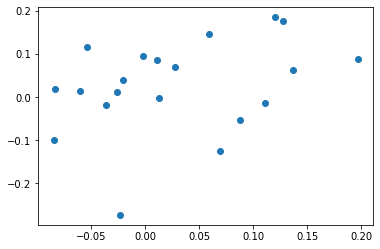

In [392]:
Plot(Y)

Comparing after changing lr

Example 1

Distance between distributions is:-1.474190340195885
Distance between distributions is:-0.2370306960079026


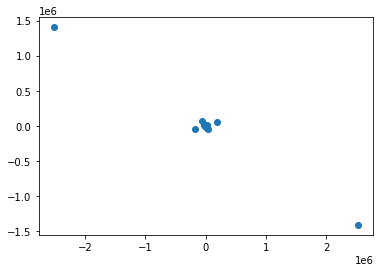

In [393]:
Y_emb,Y_itr=tsne_algo1(X,Y)
Plot(Y_emb)

Distance between distributions is:-1.474190340195885
Distance between distributions is:-0.9076184609605851


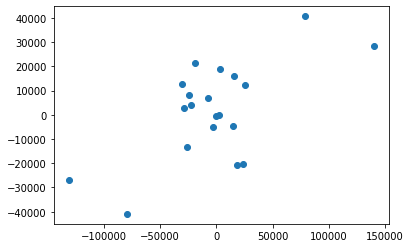

In [397]:
Y_emb,Y_itr=tsne_algo1(X,Y,lr=200)
Plot(Y_emb)

Distance between distributions is:-1.474190340195885
Distance between distributions is:-0.7467549717779256


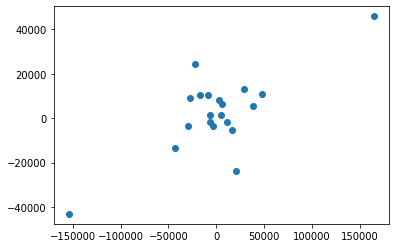

In [394]:
Y_emb,Y_itr=tsne_algo1(X,Y,lr=200,alpha=1)
Plot(Y_emb)

Distance between distributions is:-2.720949970861292
Distance between distributions is:-0.7248577128513445


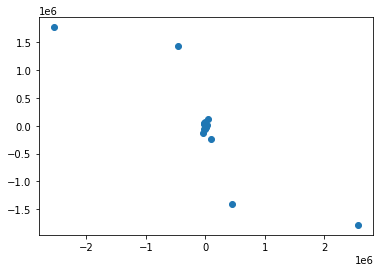

In [395]:
Y_emb,Y_itr=tsne_algo1(X,Y,perplexity=20)
Plot(Y_emb)

Distance between distributions is:-2.720949970861292
Distance between distributions is:-1.221274843300669


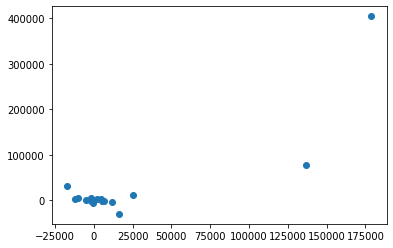

In [396]:
Y_emb,Y_itr=tsne_algo1(X,Y,perplexity=20,lr=200)
Plot(Y_emb)

*Decreasing learning rate increases kl divergence value*

Here we can notice that KL divergence value changes when perplexity changes.

The value is negative but kl divergence is a positive metric the negative value shows that the summation of the distribution is not 1.

If the kl divergence value is negative the value increases after 50 iterations.

Since KL divergence is a relative metric i.e. if the distributions are same the value will be zero. We can see that after 50 iteration the value is more closer to zero when compared to the earlier value i.e. before the iteration.

Also visually it can be seen the points are getting separated accordingly.



**Algorithm 1 is sensitive to the hyperparameters passed(learning_rate, alpha/momentum,perplexity,number of iteration) and the way data is distributed in higher and lower dimesions. Slight changes in these values produces a different output.**

**And since the optimization is not convex we cannot always get an global optimal solution**

##2(c) Now, experiment with the built-in t-SNE utility in matplotlib. Choose four different perplexity values (between 5 and 50) and generate t-SNE plots for these choices. How does perplexity affect the plots?

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


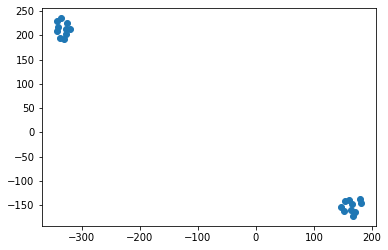

In [368]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=5.0)
X_embedded = tsne.fit_transform(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


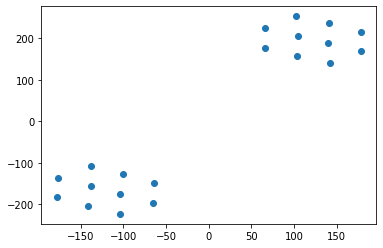

In [369]:
tsne = TSNE(perplexity=10)
X_embedded = tsne.fit_transform(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


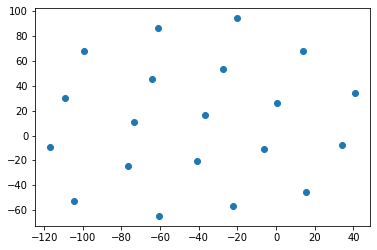

In [370]:
tsne = TSNE(perplexity=20)
X_embedded = tsne.fit_transform(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


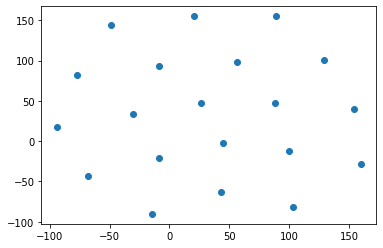

In [371]:
tsne = TSNE(perplexity=30)
X_embedded = tsne.fit_transform(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1])

We know that there are two clusters of 10 points each.

Perplexity is the number of neighbours taken into consideration while forming joint probability distributions in higher and lower dimesnions.

Logically perplexity > 20 would mean that all points are neighbours.

As we can see when perplexity is low say 5 two clusters are formed but the points within the clusters are closer and not well separated.

If perplexity =10 then there is proper separation within the cluster as well as between the clusters. i.e. closer points are close enough and far points are far enough.

Increasing perplexity more than 20 gives almost equidistant points separated over the space.

Hence, if perplexity is smaller then the points closer in high dimesions appears more close in lower dimension and the points farther appears more far. 

If perplexity is more than points appear almost equidistant to one another.

The seaparation is better when perplexity is chosen properly in the above case 10

#**Convolution and Correlation**

In this question, you will compare convolution and correlation by implementing each function. This will build on the example we did in class. Use a color image from the USC database as the input to your functions.

##Common Utils

In [372]:
def ProcessImage(imgdata,k_h,k_w):
  h,w=imgdata.shape
  column0=imgdata[:,0]
  column1=imgdata[:,w-1]
  for i in range(k_w-1):
     imgdata=np.insert(imgdata,0,values=column0,axis=1)
     imgdata=np.insert(imgdata,w,values=column1,axis=1)
  row0=imgdata[0,:]     
  row1=imgdata[h-1,:]   
  for i in range(k_h-1):
     imgdata=np.insert(imgdata,0,values=row0,axis=0)
     imgdata=np.insert(imgdata,h,values=row1,axis=0)
  return imgdata 

In [373]:
def getkernelfromImg(imgdata,k,l):
  kernel=imgdata[0:k,0:l,:]
  return kernel

[Reference link for rescaling](https://stackoverflow.com/questions/49922460/scale-a-numpy-array-with-from-0-1-0-2-to-0-255)

In [374]:
def Rescale(img):
  img= ((img - img.min()) * (1/(img.max() - img.min()) * 255)).astype('uint8')
  return img

In [375]:
def Flip180(kernel,h,w):
  flippedkernel=kernel.copy()
  for i in range(h%2):
    flippedkernel[i,:],flippedkernel[h-i-1,:]=kernel[h-i-1,:],kernel[i,:]
  k=flippedkernel.copy() 
  for i in range(w%2):
    flippedkernel[:,i],flippedkernel[:,w-i-1]=k[:,w-i-1],k[:,i]
  return flippedkernel 

In [376]:
def Flip(kernel):
  h,w,c=kernel.shape
  flipk=kernel.copy()
  for i in range(c):
    flipk[:,:,i]= Flip180(kernel[:,:,i],h,w)
  return flipk  

In [377]:
def ExtractCentralRegion(Img,w_org,h_org):
  h,w,c=Img.shape
  k_w=w-w_org
  k_h=h-h_org
  return Img[k_h:k_h+w_org,k_w:k_w+h_org,:]   

In [378]:
def ExtractImgPatch(img,i,j,k,l):
  img_patch=img[i:i+k,j:j+l]
  return img_patch

In [379]:
def OperateByPatch(img,kernel,i,j):
    h,w=kernel.shape
    img_p=ExtractImgPatch(img,i,j,h,w)
    return np.sum(np.multiply(img_p,kernel))

In [380]:
def InitializeKernels(imgdata):
  k1=np.array([[[1,1,1],[0,0,0],[1,1,1]],[[1,1,1],[0,0,0],[1,1,1]]])
  k2=np.array([[[-1,-1,-1],[-2,-2,-2],[-1,-1,-1]],[[-1,-1,-1],[0,0,0],[-1,-1,-1]],[[-2,-2,-2],[0,0,0],[-2,-2,-2]]])
  k3=getkernelfromImg(imgdata,4,5)
  k4=np.array([[[1,1,1],[2,2,2],[3,3,3]],[[4,4,4],[5,5,5],[6,6,6]],[[7,7,7],[8,8,8],[9,9,9]]])
  return k1,k2,k3,k4

In [381]:
def ApplyOperation(imgdata,kernel,op='Convolution'):
   k_h,k_w,c=kernel.shape
   h,w,c=imgdata.shape
   if op == 'Convolution':
     kernel=Flip(kernel)
   op_dim=[h+k_h-1,w+k_w-1,c]
   J=np.zeros(op_dim[0]*op_dim[1]*op_dim[2]).reshape(op_dim[0],op_dim[1],op_dim[2])
   for ch in range(c):
        reflectedimage=ProcessImage(imgdata[:,:,ch],k_h,k_w)
        for i in range(op_dim[0]):
           for j in range(op_dim[1]):
              J[i,j,ch]=OperateByPatch(reflectedimage,kernel[:,:,ch],i,j)
   return J   

##***Convolution***

Write a function that accepts an image I of size W × H × C and a convolution
kernel h of size k × k × C as inputs, and generates the channel-wise convolved image J = I ∗ h
as the output. Note that the per the definition of convolution, the size of J is going to be (W +
k − 1) × (H + k − 1). Your output must be of the same size as that of one input channel W × H.
To do so, extract the central patch of size W × H from the result of the convolution. Reflect the
input image about the edges to handle overlap and add at image boundaries. The amount of
the reflection is dictated by the size of the convolution kernel. Ensure that the you flip either the
image or the kernel about both axes in your function.

In [382]:
def Convolution(imgdata,kernel):
  op=ApplyOperation(imgdata,kernel,'Convolution')
  op=ExtractCentralRegion(op,imgdata.shape[0],imgdata.shape[1])
  op=Rescale(op)
  plt.imshow(op)

##***Correlation***

Write a function that accepts an image I of size W × H × C and a correlation
template h of size k × k × C as inputs, and generates the channel-wise correlation image J =
corr(I, h) as the output. Your output must be of the same size as of one input channel. As with
convolution, extract the central patch of size W × H from the result of correlation. Reflect the
input image about the edges to handle overlap and add at image boundaries. The amount of the
reflection is dictated by the size of the correlation template. (2)

In [383]:
def Correlation(imgdata,kernel):
  op=ApplyOperation(imgdata,kernel,'Correlation')
  op=ExtractCentralRegion(op,imgdata.shape[0],imgdata.shape[1])
  op=Rescale(op)
  plt.imshow(op)

Input image

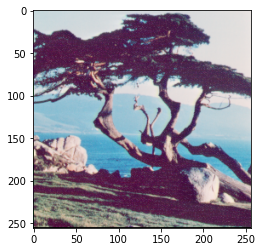

In [384]:
img,imgdata=ReadImage('4.1.06.tiff')
plt.imshow(imgdata)
k1,k2,k3,k4=InitializeKernels(imgdata)

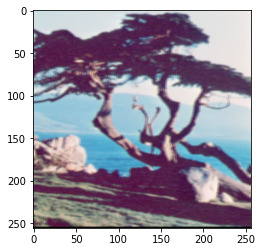

In [385]:
Correlation(imgdata,k1)

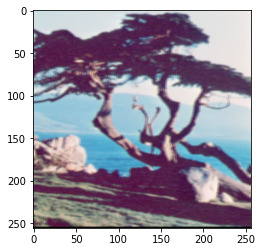

In [386]:
Convolution(imgdata,k1)

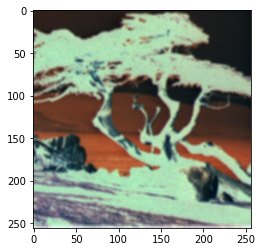

In [387]:
Correlation(imgdata,k2)

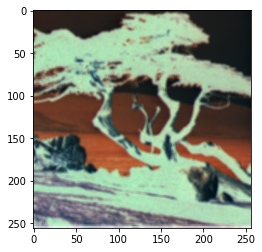

In [388]:
Convolution(imgdata,k2)

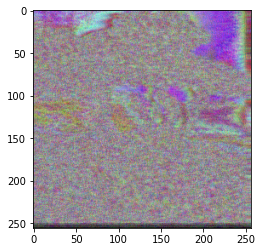

In [389]:
Convolution(imgdata,k3)

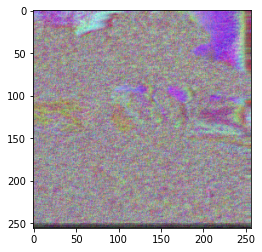

In [390]:
Correlation(imgdata,k3)

*   Kernel 1 is asymmetric kernel. Kernel 2 is symmetric kernel with negative values and Kernel 3 is obtained from the Image.
*   The output image obtained from k1,k2,k3 from both the functions look similar. But the output obtained from Kernel 3 shows a boundary/edge.


*  Output of convolved/correlated image is with k1 when compared to original image is a blurred  



